In [183]:
import numpy as np

class RidgeRegression:

    def __init__(self, learning_rate=0.001, alpha=1.0, n_iters=5000):
        self.lr = learning_rate
        self.alpha = alpha
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            y_pred = X.dot(self.w) + self.b
            error = y_pred - y


            dw = (2 / n_samples) * X.T.dot(error) + 2 * self.alpha * self.w
            db = (2 / n_samples) * np.sum(error)
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        return X.dot(self.w) + self.b


In [184]:
import numpy as np

class LassoRegression:

    def __init__(self, learning_rate=0.001, alpha=0.1, n_iters=5000):
        self.lr = learning_rate
        self.alpha = alpha
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            y_pred = X.dot(self.w) + self.b
            error = y_pred - y


            dw = (2 / n_samples) * X.T.dot(error) + self.alpha * np.sign(self.w)
            db = (2 / n_samples) * np.sum(error)
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        return X.dot(self.w) + self.b


In [185]:
import pandas as pd
import numpy as np

df = pd.read_csv("Boston.csv")

In [186]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [187]:
print('df.columns:', df.columns)


df.columns: Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')


In [188]:
df = df.drop(columns=["Unnamed: 0"])


In [189]:
print('df.columns:', df.columns)

df.columns: Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')


In [190]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [191]:
df.info

<bound method DataFrame.info of         crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio   black  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.9

In [192]:
df.shape

(506, 14)

In [193]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [257]:
X = df.drop("medv", axis=1).values
y = df["medv"].values


np.random.seed(110)
indices = np.random.permutation(len(X))
split = int(0.8 * len(X))

train_idx = indices[:split]
test_idx = indices[split:]

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [248]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]], shape=(506, 13))

In [249]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [258]:

ridge = RidgeRegression(learning_rate=0.01, alpha=1.0, n_iters=1000)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)


lasso = LassoRegression(learning_rate=0.01, alpha=0.1, n_iters=1000)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)


In [259]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

print("Ridge MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Lasso MSE:", mean_squared_error(y_test, y_pred_lasso))


Ridge MSE: 22.001119197350043
Lasso MSE: 16.283577639420866


In [260]:
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ss_res / ss_tot)

print("Ridge R² score:", r2_score(y_test, y_pred_ridge))
print("Lasso R² score:", r2_score(y_test, y_pred_lasso))


Ridge R² score: 0.7319468384418601
Lasso R² score: 0.8016071624097229


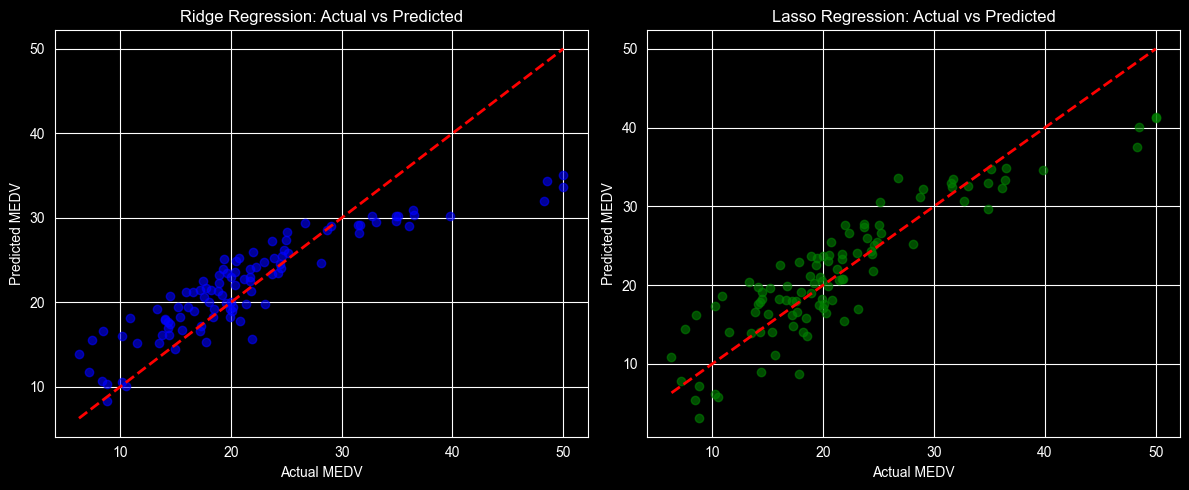

In [261]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ridge, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Ridge Regression: Actual vs Predicted")


plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_lasso, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Lasso Regression: Actual vs Predicted")

plt.tight_layout()
plt.show()


In [264]:
import numpy as np



crim = float(input("Enter CRIM : "))
zn = float(input("Enter ZN : "))
indus = float(input("Enter INDUS : "))
chas = float(input("Enter CHAS: "))
nox = float(input("Enter NOX : "))
rm = float(input("Enter RM : "))
age = float(input("Enter AGE : "))
dis = float(input("Enter DIS : "))
rad = float(input("Enter RAD : "))
tax = float(input("Enter TAX : "))
ptratio = float(input("Enter PTRATIO : "))
black = float(input("Enter BLACK : "))
lstat = float(input("Enter LSTAT : "))


input_features = np.array([[crim, zn, indus, chas, nox, rm, age, dis,
                            rad, tax, ptratio, black, lstat]])


input_scaled = (input_features - X_train.mean(axis=0)) / X_train.std(axis=0)


ridge_pred = ridge.predict(input_scaled)
lasso_pred = lasso.predict(input_scaled)

print("Predicted MEDV :")
print(f"Ridge Regression Prediction: {ridge_pred[0]:.2f}")
print(f"Lasso Regression Prediction: {lasso_pred[0]:.2f}")


Enter the following features for Boston Housing:
Predicted MEDV :
Ridge Regression Prediction: 63.83
Lasso Regression Prediction: -94.97


In [262]:
print("Max weight:", np.max(np.abs(ridge.w)))


Max weight: 1.9958959509660779


In [202]:
print("Input (raw):", input_features)
print("Input (scaled):", input_scaled)


Input (raw): [[2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]]
Input (scaled): [[ 2.73100000e-02  1.03052880e-16  7.07000000e+00 -4.19081711e-17
   4.69000000e-01  6.42100000e+00  7.89000000e+01  4.96710000e+00
   2.00000000e+00  2.42000000e+02  1.78000000e+01  3.96900000e+02
   9.14000000e+00]]
